# Import Libraries

In [30]:
import os
from pathlib import Path
import numpy as np
import json
import random
import matplotlib.pyplot as plt

from DatasetInterface import MSCOCOInterface
from pathlib import Path

In [31]:
root = Path('Datasets/coco')
imgs_path = root/'images'/'train2017'
# imgs_path = root/'train2017'
captions_path = root/'annotations'/'captions_train2017.json'
# captions_path = root/'annotations_trainval2017'/'annotations'/'captions_train2017.json'

with open('vocabulary/string_to_index.json') as json_file:
    string_to_index = json.load(json_file)
    
idx_to_string = dict(zip(string_to_index.values(), string_to_index.keys()))

interface_params = {
    'imgs_path': imgs_path,
    'captions_path': captions_path,
    'freq_threshold': 1,
    'sequence_length': 20,
    'caps_per_img': 10,
    'idx_to_string': idx_to_string,
    'string_to_index': string_to_index
}

In [14]:
%%time
coco_interface = MSCOCOInterface(**interface_params)

CPU times: user 1.87 s, sys: 274 ms, total: 2.14 s
Wall time: 2.37 s


In [15]:
print(coco_interface.caps_per_img)

5


In [16]:
img_idx = 3
file_name = coco_interface.coco.imgs[img_idx]
coco_interface.coco.get_captions(file_name)

['two boys through a frisbee during a game on a field',
 'A group of young people playing a game of frisbee.',
 'A few young me in a park playing with a Frizbee.',
 'The man are playing a game of Frisbee outside in the field. ',
 'Young men are playing frisbee in a park.']

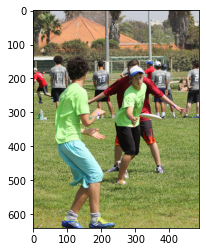

two boys through a frisbee during a game on a field 
a group of young people playing a game of frisbee 
a few young me in a park playing with a frizbee 
the man are playing a game of frisbee outside in the field 
young men are playing frisbee in a park 


In [17]:
#idx = random.randint(0, len(coco_interface.coco.imgs))
idx = img_idx*coco_interface.caps_per_img
coco_interface.display_img_with_captions(idx)
for cap_idx in range(coco_interface.caps_per_img):
    
    cap = ''
    idx, X, y = coco_interface[idx]
    for word_idx in y:
        if word_idx != 0:
            cap += coco_interface.idx_to_string[word_idx.item()] + ' '
    idx += 1
    print(cap)

In [18]:
%%time
coco_interface.idx_to_string = None
coco_interface.string_to_index = None
coco_interface.vocabulary.build_vocab2(coco_interface.coco.captions_to_list())

CPU times: user 13.3 s, sys: 348 ms, total: 13.6 s
Wall time: 13.7 s
